In [829]:
import pandas as pd
import numpy as np

In [830]:
tdf = pd.read_csv('/content/train-chennai-sale.csv')
tdf.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [831]:
df = tdf.drop('PRT_ID', axis = 1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# Feature "Area"

In [832]:
df['AREA'].isnull().sum()

0

In [833]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [834]:
df['AREA'].replace({'Chrompet':'Chrompet','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakkam':'Karapakkam','Karapakam':'Karapakkam','KK Nagar':'KK Nagar','KKNagar':'KK Nagar','Velachery':'Velachery','Velchery':'Velachery','Anna Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyar':'Adyar','Adyr':'Adyar','T Nagar':'T Nagar','TNagar':'T Nagar'},inplace=True)


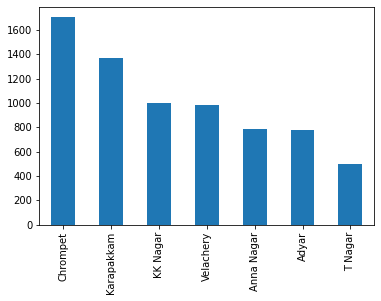

In [835]:
df['AREA'].value_counts().plot.bar()

In [836]:
# Interpretation of the above plot.
#   we have plotted the bar plot for the frequency of values under each name.
#   we see that the T Nagar has the lowest frequency and the chrompet
#   has the highest frequency that is the houses sold as per the data.

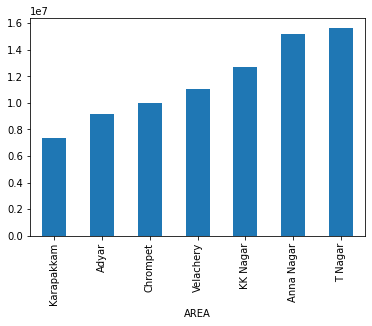

In [837]:
df.groupby(['AREA'])['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [838]:
# Interpretation of the above plot.
    # we have plotted a bar char with value sorted ascending, comparing 
    # to sales price and we have understood that the T nagar pricing is very high,
    # though the houses sold is less. 
    # Chrompet sales is in the lead with a moderate sales price 
    # intresting fact is that the Adyar houses pricing are less and yet the sales is least.
    # we also see a linear relationship, sales wise in the data, so we will be lable encoding to retain the order.

In [839]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [840]:
Area = {'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}

In [841]:
df['AREA'] = df['AREA'].map(Area, df['AREA'])
df.AREA.head()

0    0
1    5
2    1
3    3
4    0
Name: AREA, dtype: int64

# Fearure "INT_SQFT"

In [842]:
df.INT_SQFT.isnull().sum()

0

In [843]:
df['INT_SQFT'].dtype

dtype('int64')

In [844]:
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

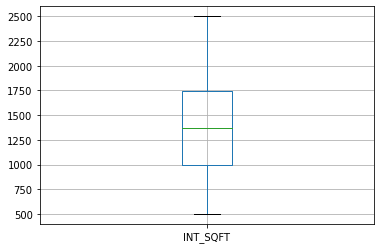

In [845]:
df.boxplot(column = 'INT_SQFT')

In [846]:
# no outliers in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2b8f0cf10>]],
      dtype=object)

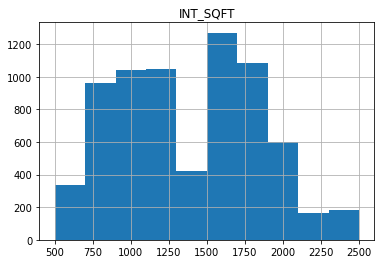

In [847]:
df.hist(column = ['INT_SQFT'])

In [848]:
# we see a normal bell shaped curve.
# this shows that the most of the houses in the data are 1300 sqft at an average.

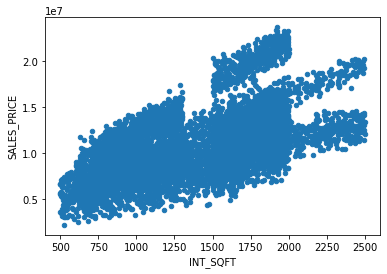

In [849]:
df.plot.scatter('INT_SQFT', 'SALES_PRICE')

In [850]:
# by the plot its clear that there is a linear relationship in the data.
# its obvious that for an increasing sqft size, there will be increase in the prize

# Fearure "DATE_SALE"

In [851]:
df.DATE_SALE.dtype

dtype('O')

In [852]:
df.DATE_SALE.isnull().sum()

0

In [853]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
df.DATE_SALE.dtype

dtype('<M8[ns]')

In [854]:
df['Sale Year'] = pd.DatetimeIndex(df.DATE_SALE).year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   object        
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

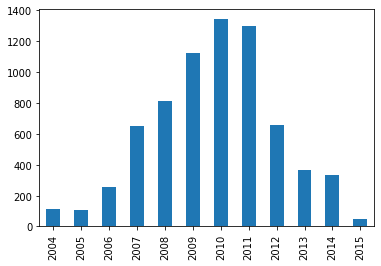

In [855]:
df['Sale Year'].value_counts().sort_index(ascending=True).plot.bar()

In [856]:
# Interpretation of the above plot
# we can see that the the 2015 sales has droped drastically and also the best sales was on 2010 for the houses.
# the data is normally distributed among the years though.

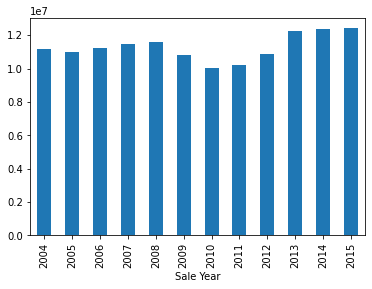

In [857]:
df.groupby(['Sale Year'])['SALES_PRICE'].mean().plot.bar()

In [858]:
# we can see the relation ship is uniform among all the years not much difference in the prices
# eventhough the price did not have a big change we can use it to find the age.

In [859]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Fearure "DIST_MAINROAD"

In [860]:
df.DIST_MAINROAD.isnull().sum()

0

In [861]:
df.DIST_MAINROAD.dtype

dtype('int64')

In [862]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

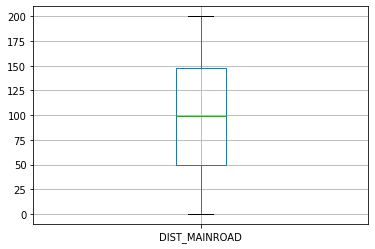

In [863]:
df.boxplot(column='DIST_MAINROAD')

In [864]:
# its clear there is no outliers
# the median of the distance is 100 as the boxplot indicates.

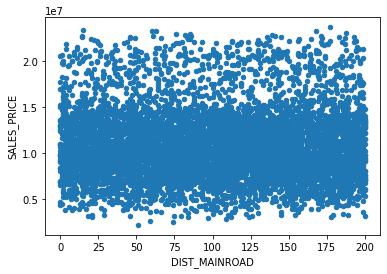

In [865]:
df.plot.scatter(x='DIST_MAINROAD',y='SALES_PRICE')

In [866]:
# on the relationship plot we can understand that there is not much difference in the prices.
# Even though the distance is more or less the sales price has not changed a lot.
# since the distribution has been uniform we will be droping this column.

In [867]:
df.drop('DIST_MAINROAD',axis =1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'N_BEDROOM'

In [868]:
df.N_BEDROOM.isnull().sum()

1

In [869]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [870]:
df['N_BEDROOM'].fillna(df.N_BEDROOM.mode()[0], inplace =True)
df.N_BEDROOM.isnull().sum()

0

In [871]:
df.N_BEDROOM.astype(int)

0       1
1       2
2       1
3       3
4       1
       ..
7104    1
7105    3
7106    2
7107    1
7108    3
Name: N_BEDROOM, Length: 7109, dtype: int64

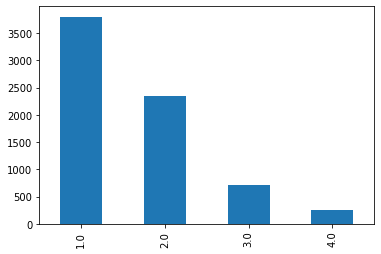

In [872]:
df['N_BEDROOM'].value_counts().plot.bar()

In [873]:
# the data is right Skewed and we can clearly see the rooms that have 1 bed room is more.

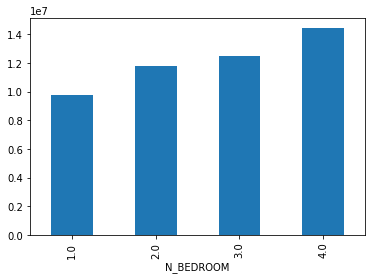

In [874]:
df.groupby('N_BEDROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [875]:
# its clear there is a linear relationship.
# the obvious thing is, as the rooms increase there will be increase in the price.

In [876]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'N_BATHROOM'

In [877]:
df.N_BATHROOM.isnull().sum()

5

In [878]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace = True)
df['N_BATHROOM'].unique()

array([1., 2.])

In [879]:
df.N_BATHROOM.astype(int)

0       1
1       1
2       1
3       2
4       1
       ..
7104    1
7105    2
7106    1
7107    1
7108    2
Name: N_BATHROOM, Length: 7109, dtype: int64

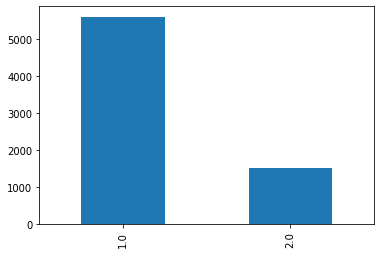

In [880]:
df.N_BATHROOM.value_counts().plot.bar()

In [881]:
# as we see that the most of the houses have one bath room.
# we still see 30% of the houses having 2 bathrooms which is intresting. 

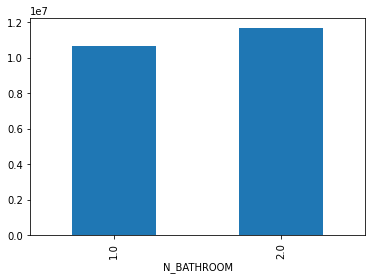

In [882]:
df.groupby('N_BATHROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [883]:
# as we see the relationship is in order.
# when the bathrooms increase the price also increases.
# we are not encoding as the data is already numeric and in order

# Feature N_ROOM

In [884]:
df.N_ROOM.isnull().sum()

0

In [885]:
print(df.N_ROOM.dtype)
print(df.N_ROOM.unique())

int64
[3 5 4 2 6]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


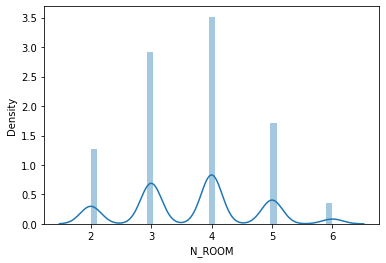

In [886]:
import seaborn as sns 
sns.distplot(df['N_ROOM'])

In [887]:
# the dist is kind of normal but we can see that the 4 rooms houses are the most in the data.
# we can eventually suspect if the rooms are inclusive of bathrooms too.

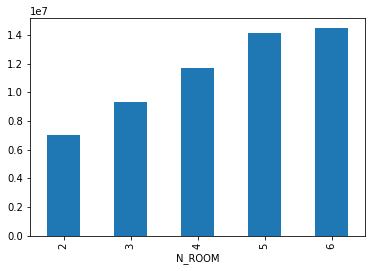

In [888]:
df.groupby('N_ROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [889]:
# as we saw earlier as the rooms increase the price has increased.
# since the order is already maintaind no encoding required.
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'SALE_COND'

In [890]:
df.SALE_COND.isnull().sum()


0

In [891]:
print(df['SALE_COND'].dtype)
df['SALE_COND'].unique()

object


array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [892]:
ctype = {'AbNormal': 'Abnormal', 'Family':'Family', 'Partial':'Partial', 'AdjLand':'Adjland', 'Normal Sale':'Normal', 'Ab Normal':'Abnormal', 'Partiall':'Partial', 'Adj Land':'Adjland', 'PartiaLl':'Partial'}

df['SALE_COND'] = df['SALE_COND'].map(ctype,df['SALE_COND'])
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'Partial', 'Adjland', 'Normal'], dtype=object)

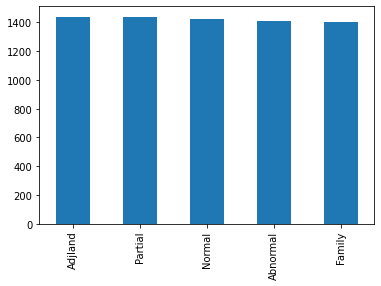

In [893]:
df.SALE_COND.value_counts().plot.bar()

In [894]:
# We can see an uniformly distributed data, for all the type of house.
# the interpretation would be that the sale has happened nomatter what type of house sale it is.

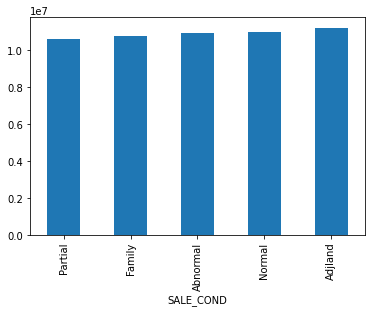

In [895]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [896]:
# we can clearly intrept that no matter what type of house it is, the price is not affected by it.
# when the data's relationship is uniform we can definately remove it as it makes no value.
df.drop('SALE_COND',inplace=True, axis=1)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'PARK_FACIL'

In [897]:
df.PARK_FACIL.isnull().sum()

0

In [898]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [899]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes': 1, 'No': 0, 'Noo':0},df['PARK_FACIL'])

In [900]:
df['PARK_FACIL'].dtype

dtype('int64')

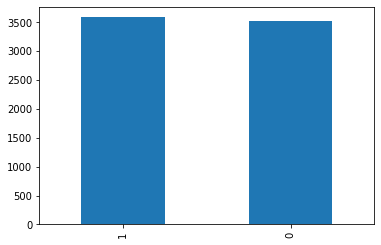

In [901]:
df.PARK_FACIL.value_counts().plot.bar()

In [902]:
# from the above plot we can intrepret that we have equal ammount of data for the house sold with parking and without parking.
# we definately see no Skew in the data.

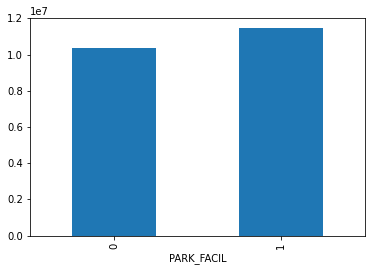

In [903]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [904]:
# it has a very slight relationship with the price.
# house with parking fesility has given a little bit of price increase.
# Since we still have some relationship we Retain this column.
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Sale Year'],
      dtype='object')

# Feature 'DATE_BUILD

In [905]:
df.DATE_BUILD.isnull().sum()

0

In [906]:
df.DATE_BUILD.dtype

dtype('O')

In [907]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df['Built Year'] = pd.DatetimeIndex(df.DATE_BUILD).year
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [908]:
df['AGE'] = df['Sale Year'] - df['Built Year']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


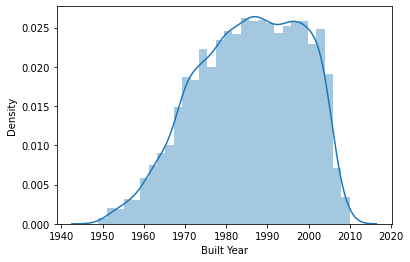

In [909]:
sns.distplot(df['Built Year'])

In [910]:
# from the above plot we can see that the houses are buit mostly before the year 2000.
# most of the houses are from 1985.
# though it looks like normal dist, it has a bit of left skew.

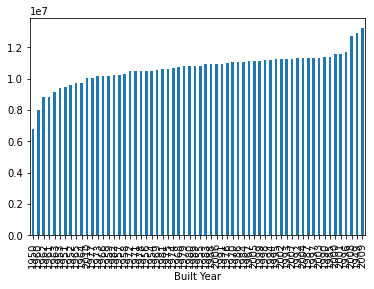

In [911]:
df.groupby('Built Year')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [912]:
# we see randomness in the both built and the sold year.
# there is not a verygood relationship to the price so we are droping both the columns.
df.drop('Built Year',axis=1,inplace = True)
df.drop('Sale Year',axis=1,inplace = True)
df.drop('DATE_SALE',axis=1,inplace = True)
df.drop('DATE_BUILD',axis=1,inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE'],
      dtype='object')

# Feature 'BUILDTYPE'

In [913]:
df['BUILDTYPE'].isnull().sum()

0

In [914]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [915]:
typeh = {'Commercial':'Commercial', 'Others':'Others', 'Other':'Others', 'House':'House', 'Comercial':'Commercial'}
df['BUILDTYPE'] = df['BUILDTYPE'].replace(typeh)
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

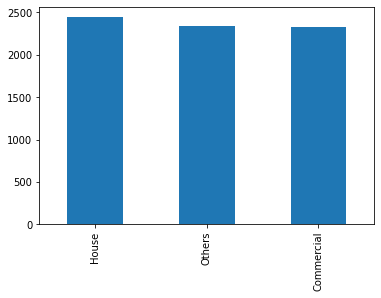

In [916]:
df.BUILDTYPE.value_counts().plot.bar()

In [917]:
# we see that the data is evenly distributed among all three types.
# so all the type of house has been evenly sold in the data.

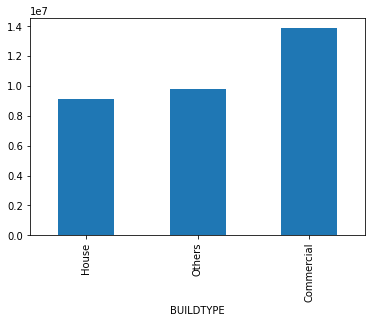

In [918]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [919]:
# There is a pure relationship between price and the type of the building.
# The relationship is definately not a linear, so we are one hot encoding it.
# the commercial houses obviously has a high price.

In [920]:
df = pd.get_dummies(df,columns=['BUILDTYPE'])

In [921]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Feature 'UTILITY_AVAIL'

In [922]:
df['UTILITY_AVAIL'].isnull().sum()

0

In [923]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [924]:
m = {'AllPub':'AllPub' , 'ELO':'ELO', 'NoSewr ':'NoSewr', 'NoSeWa':'NoSeWa', 'All Pub':'AllPub'}
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(m)

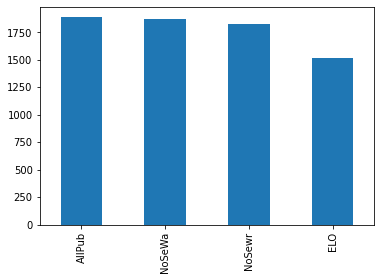

In [925]:
df.UTILITY_AVAIL.value_counts().plot.bar()

In [926]:
# the houses with Elo fesility are a sold a bit less.

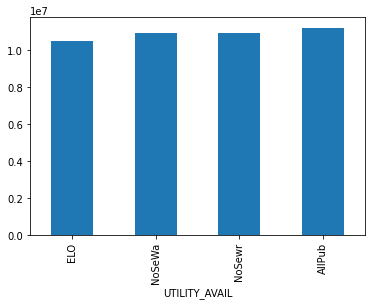

In [927]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [928]:
# we see an mostly even price among all the classes.
# Utility obviously matter to the price change but in our data 
# the Utilities has average relationship with price. so we are still droping this feature.
df.drop(columns='UTILITY_AVAIL',axis = 1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Feature 'STREET'

In [929]:
df['STREET'].isnull().sum()

0

In [930]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [931]:
sttype = {'Paved':'Paved', 'Gravel':'Gravel', 'No Access':'No Access', 'Pavd':'Paved', 'NoAccess':'No Access'}
df['STREET'].replace(sttype,inplace=True)

In [932]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

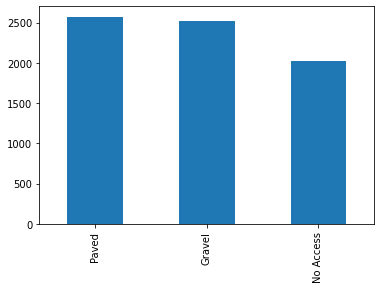

In [933]:
df.STREET.value_counts().plot.bar()

In [934]:
# the data of the No Access is a bit less in the data compared to other features.

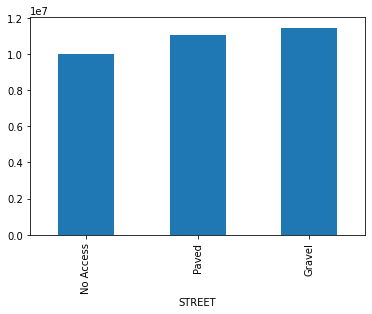

In [935]:
df.groupby('STREET')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [936]:
# we see a linear relationship here so we will lable encode 
# and retain the order.
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [937]:
stmap = {'Paved':1, 'Gravel':2, 'No Access':0}
df.STREET.replace(stmap,inplace=True)

In [938]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Feature 'MZZONE'

In [939]:
df['MZZONE'].isnull().sum()

0

In [940]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

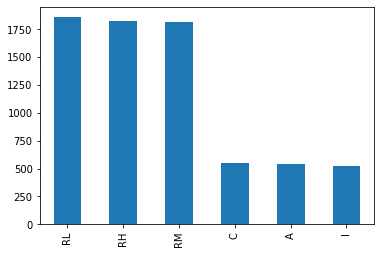

In [941]:
df.MZZONE.value_counts().plot.bar()

In [942]:
# as per the data we have more data of the residential High, low and medium density landdata.
# it is a right skewed data.

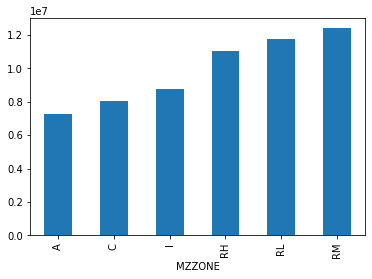

In [943]:
df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [944]:
# we definately see a linear Relationship in the Data.
# Agri lands are low priced residential medium are very high priced.
# and in the dist plot we understood that the A,C,I has a very huge imbalance
# which is more that 70% so in this feature if we are trying to impute or drop rows.
# we will loose a lot of info. so we will drop this column.

In [945]:
df.drop('MZZONE',axis =1, inplace=True)

In [946]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

Feature QS_ROOMS

In [947]:
df.QS_ROOMS.isnull().sum()

0

In [948]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


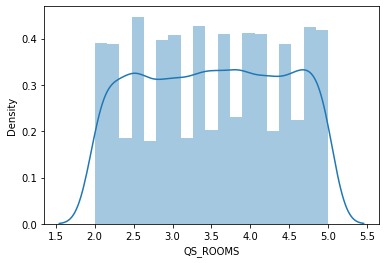

In [949]:
sns.distplot(df['QS_ROOMS'])

In [950]:
# we can see the data is uniformly distributed.
# the dataset has equal ammount of data for all class ratings.

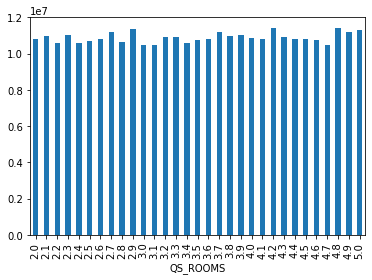

In [951]:
df.groupby('QS_ROOMS')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [952]:
# our unique values already has a rating order so we are to sort the index.
# as per our index we dont see any linear relationship and we are droping the feature.
df.drop(columns=['QS_ROOMS'],inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

Feature 'QS_BATHROOM'

In [953]:
df['QS_BATHROOM'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


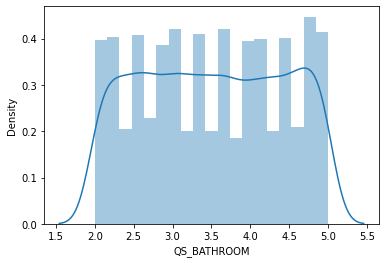

In [954]:
sns.distplot(df['QS_BATHROOM'])

In [955]:
# again the data we see is uniform.
# we dont have too much of any data.

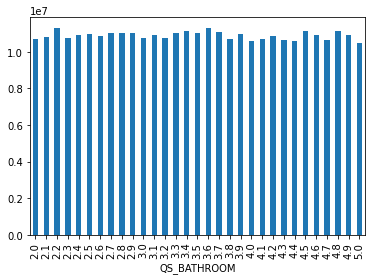

In [956]:
df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [957]:
# no relationship in terms of price.
df.drop(columns=['QS_BATHROOM'],inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

Feature QS_BEDROOM

In [958]:
df.QS_BEDROOM.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


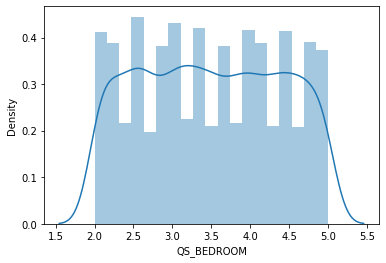

In [959]:
sns.distplot(df['QS_BEDROOM'])

In [960]:
# Uniform.....

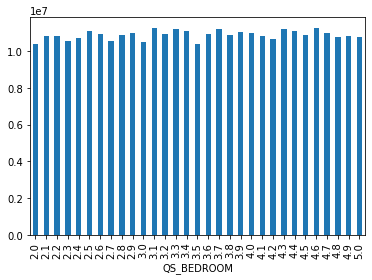

In [961]:
df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [962]:
# no relationship.
df.drop(columns= ['QS_BEDROOM'],inplace = True)

Feature QS_OVERALL

In [963]:
df.QS_OVERALL.isnull().sum()

48

In [964]:
df.QS_OVERALL.fillna(df.QS_OVERALL.mode(),inplace=True)

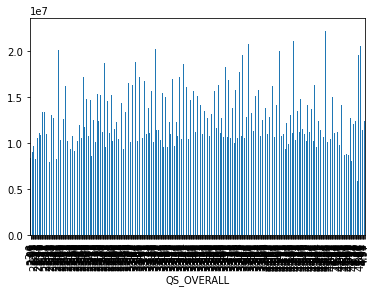

In [965]:
df.groupby('QS_OVERALL')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [966]:
# Drop
df.drop(columns = ['QS_OVERALL'], inplace=True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [967]:
# we will drop REG_FEE and commis as our target is fixed as sales price.
# if we need to use them we will have to add them up with sales and it is a 
# restart of all the progress and also will not make much difference.
df.drop(columns=['REG_FEE','COMMIS'],inplace=True) 
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Target 'SALES_PRICE'

In [968]:
df.SALES_PRICE.isnull().sum()

0

In [969]:
df.SALES_PRICE.dtype

dtype('int64')

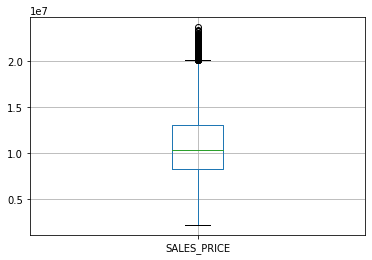

In [970]:
df.boxplot(column=['SALES_PRICE'])

In [971]:
# we see outliers but its regarding the over priced houses.
# this data will definately make sense when it comes to the relationship with other 
# columns and also the we can identify the factors that has influenced the sales price.
# here the outliers are necessary and not required to be deleted.
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'STREET', 'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# Feature 'AGE'

In [972]:
df.AGE.isnull().sum()

0

In [973]:
df.AGE.dtype

dtype('int64')

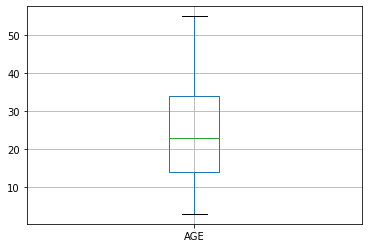

In [974]:
df.boxplot(column = ['AGE'])

In [975]:
# we see no outliers
# the data is good to go. the intreasiting point is that,
# the median age stands arround 23-25 while the max is still arround 55-60
# normal distribution overall

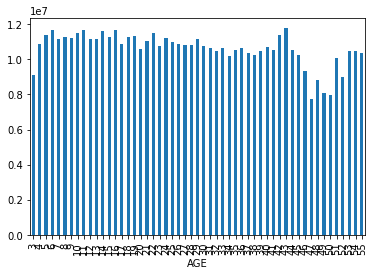

In [976]:
df.groupby('AGE')['SALES_PRICE'].mean().sort_index(ascending=True).plot.bar()

In [977]:
# there is an inverse relationship, it has ups and downs
# but we can see the linear pattern .
# we also see 43 years old house with a very high price
# which explains the other features are more influensive also.
# this column definately has values to contribute.
# so we are retaining.

In [978]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1.0,1.0,3,1,1,7600000,44,1,0,0
1,5,1986,2.0,1.0,5,0,2,21717770,11,1,0,0
2,1,909,1.0,1.0,3,1,2,13159200,20,1,0,0
3,3,1855,3.0,2.0,5,0,1,9630290,22,0,0,1
4,0,1226,1.0,1.0,3,1,2,7406250,30,0,0,1


In [979]:
# we see all columns in numbers and so we will be moving to the next step, as the data is clean.

# Splitting the Data.

In [980]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [981]:
x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
2493,3,1574,2.0,1.0,4,0,0,5,1,0,0
6633,0,1650,2.0,2.0,4,1,2,19,0,0,1
6033,2,1081,1.0,1.0,3,1,2,4,0,0,1
6923,6,1840,2.0,1.0,5,1,1,41,0,0,1
171,2,1020,1.0,1.0,3,0,0,24,0,1,0


# Linear regression

In [982]:
from sklearn import linear_model
features = list(df.columns)
features.remove('SALES_PRICE')

In [983]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: 2544547.0127642723
coefficients: [ 8.26770428e+05  5.38373623e+02 -1.58585401e+06  4.74702166e+05
  1.91109967e+06  1.01158934e+06  5.16524141e+05 -2.29271370e+04
  2.88731254e+06 -1.77415637e+06 -1.11315617e+06]


# Feature Importances

In [984]:
import itertools

combinations = []
for x in range(1,8):
    combinations.append(itertools.combinations(df[features], x))

best_score = 0
bestfeatures = []
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        linreg = linear_model.LinearRegression()
        linreg.fit(x, y)
        score = linreg.score(x, y)
        if score > best_score:
          best_score = score
          bestfeatures = x.columns

In [985]:
print('R2 =',best_score,'\n')
print('Best Features are...\n')
for i in range(len(bestfeatures)):
  print(i+1,' ',bestfeatures[i])

R2 = 0.868314218757007 

Best Features are...

1   AREA
2   N_BEDROOM
3   N_ROOM
4   PARK_FACIL
5   STREET
6   AGE
7   BUILDTYPE_Commercial


# Scaling the data.

In [986]:
x = df.drop(columns=['SALES_PRICE'])
y = df['SALES_PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
5119,4,2349,4.0,2.0,6,0,1,25,0,1,0
7023,2,711,1.0,1.0,2,0,2,15,0,0,1
1017,0,1058,1.0,1.0,3,1,2,11,0,0,1
3397,2,869,1.0,1.0,3,1,1,17,0,0,1
6868,0,1074,1.0,1.0,3,0,0,45,1,0,0


In [987]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.80456768,  2.12719734,  2.9582025 , ..., -0.70945279,
         1.38509028, -0.69001438],
       [-0.28039947, -1.4565579 , -0.78861974, ..., -0.70945279,
        -0.7219746 ,  1.44924516],
       [-1.36536661, -0.69736189, -0.78861974, ..., -0.70945279,
        -0.7219746 ,  1.44924516],
       ...,
       [-1.36536661, -0.07600261,  0.46032101, ...,  1.40953706,
        -0.7219746 , -0.69001438],
       [ 0.80456768,  0.23248914,  0.46032101, ...,  1.40953706,
        -0.7219746 , -0.69001438],
       [ 1.34705125,  0.34844703, -0.78861974, ..., -0.70945279,
        -0.7219746 ,  1.44924516]])

# KNN Model Building

In [988]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

l_ac = []
for i in [1,2,3,4,5,6,7,8,9,10]:
  knn = KNeighborsRegressor(i)
  knn.fit(x_train,y_train)
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
  l_ac.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))

K value  :  1  train score :  0.9999931751677631  score :  0.8998417596746091
K value  :  2  train score :  0.9753556640661943  score :  0.922045064123467
K value  :  3  train score :  0.9659880775256863  score :  0.9290244722151119
K value  :  4  train score :  0.9609246214502417  score :  0.9314981830631913
K value  :  5  train score :  0.9568786254300311  score :  0.9316304161598726
K value  :  6  train score :  0.954101318291986  score :  0.9310476076531791
K value  :  7  train score :  0.9509499817578017  score :  0.9304231408427877
K value  :  8  train score :  0.9481526002244194  score :  0.9302486922643087
K value  :  9  train score :  0.9460700928036236  score :  0.9288447634519192
K value  :  10  train score :  0.9440388672490172  score :  0.9279948157943625


In [990]:
# we will take the Kvalue as 5 as the train score and the test score perfect.
# it does'nt seam to over fit or underfit in the 4 near neighbours.
# our score is 0.9316304161598726

# Decision Tree Model Building.

In [991]:
from sklearn.tree import DecisionTreeRegressor

for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeRegressor(max_depth=depth)
  
  dt.fit(x_train, y_train)
  trainAccuracy = dt.score(x_train,y_train) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, x, y, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.36099728027058375  Cross val score :  0.3588875752516194
Depth  :  2  Training Accuracy :  0.6881482349313295  Cross val score :  0.6819059001742293
Depth  :  3  Training Accuracy :  0.8022938718746107  Cross val score :  0.8016324100218641
Depth  :  4  Training Accuracy :  0.8873012284553474  Cross val score :  0.8827061313816389
Depth  :  5  Training Accuracy :  0.9125862176792059  Cross val score :  0.9049491437125535
Depth  :  6  Training Accuracy :  0.9301360790902086  Cross val score :  0.9187480912339888
Depth  :  7  Training Accuracy :  0.9430620543392244  Cross val score :  0.9272736804904026
Depth  :  8  Training Accuracy :  0.9527198325903707  Cross val score :  0.9309821258014466
Depth  :  9  Training Accuracy :  0.9617008640102553  Cross val score :  0.9291896692139929
Depth  :  10  Training Accuracy :  0.9705923980004485  Cross val score :  0.9248582595441078


In [992]:
# depth of 8 dose not seem to be over fitting as we see training accuracy 
# is greater than the cross valdation. so we will take 8 as our depth and the
# score is 0.9309821258014466

# Random Forest Model Building

# Bagging

In [1014]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
  model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = depth, random_state=8), n_estimators=100)
  model.fit(x_train, y_train)
  model.score(x_test,y_test)
  valAccuracy = cross_val_score(rf, x, y, cv=10)
  print(depth," Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

1  Training Accuracy :  0.9705923980004485  Cross val score :  0.9442103887912076
2  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441699350516155
3  Training Accuracy :  0.9705923980004485  Cross val score :  0.9440742573334434
4  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441775969273294
5  Training Accuracy :  0.9705923980004485  Cross val score :  0.9440769524527022
6  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441886180791841
7  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441158732652222
8  Training Accuracy :  0.9705923980004485  Cross val score :  0.9439120558075977
9  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441779279182125
10  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441370157106459
11  Training Accuracy :  0.9705923980004485  Cross val score :  0.9441506800783948
12  Training Accuracy :  0.9705923980004485  Cross val score :  0.9440301622761298
13  Training 

In [ ]:
# depth of 6 was the best with a score of 0.9441886180791841

In [1013]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
  rf = RandomForestRegressor(n_estimators= 100, max_depth = depth, max_features='sqrt')
  rf.fit(x_train, y_train)
  valAccuracy = cross_val_score(rf, x, y, cv=10)
  print(depth," Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

1  Training Accuracy :  0.9705923980004485  Cross val score :  0.4191380012678933
2  Training Accuracy :  0.9705923980004485  Cross val score :  0.6587805788051979
3  Training Accuracy :  0.9705923980004485  Cross val score :  0.7923664703005145
4  Training Accuracy :  0.9705923980004485  Cross val score :  0.8645775583151224
5  Training Accuracy :  0.9705923980004485  Cross val score :  0.9029012734767639
6  Training Accuracy :  0.9705923980004485  Cross val score :  0.9224231175722304
7  Training Accuracy :  0.9705923980004485  Cross val score :  0.9337322275439496
8  Training Accuracy :  0.9705923980004485  Cross val score :  0.9407339600775417
9  Training Accuracy :  0.9705923980004485  Cross val score :  0.9442560263440953
10  Training Accuracy :  0.9705923980004485  Cross val score :  0.9461241964699019
11  Training Accuracy :  0.9705923980004485  Cross val score :  0.9465762749290455
12  Training Accuracy :  0.9705923980004485  Cross val score :  0.9462684563298749
13  Training 

In [ ]:
# in the Random forest our accuracy is a drastic increase to 0.9465762749290455
# 11 was the max depth.

# XG_Boost

In [1041]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
score = -70
l = 0
for lr in np.arange(0.01, 0.30, 0.01):
  lr = round(lr,2)
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train,y_train) 
  model.score(x_test, y_test)
  s = np.mean(cross_val_score(model, x_train, y_train, cv=10))
  t = model.score(x_train,y_train)
  if s > score and t > s:
    score = s
    l = lr
print('The best score obtained = ',score)
print('The learning rate =',l)    

The best score obtained =  0.9513621191966773
The learning rate = 0.16


In [1042]:
# we have got the best score for the data to be 0.9513621191966773
# at a learning rate of 0.16 through xgboost.
# this is the highest score so far.